<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [23]:
!pip install pandas

In [24]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [25]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-18 16:38:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  62.1MB/s    in 2.4s    

2025-07-18 16:38:38 (62.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [27]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [28]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



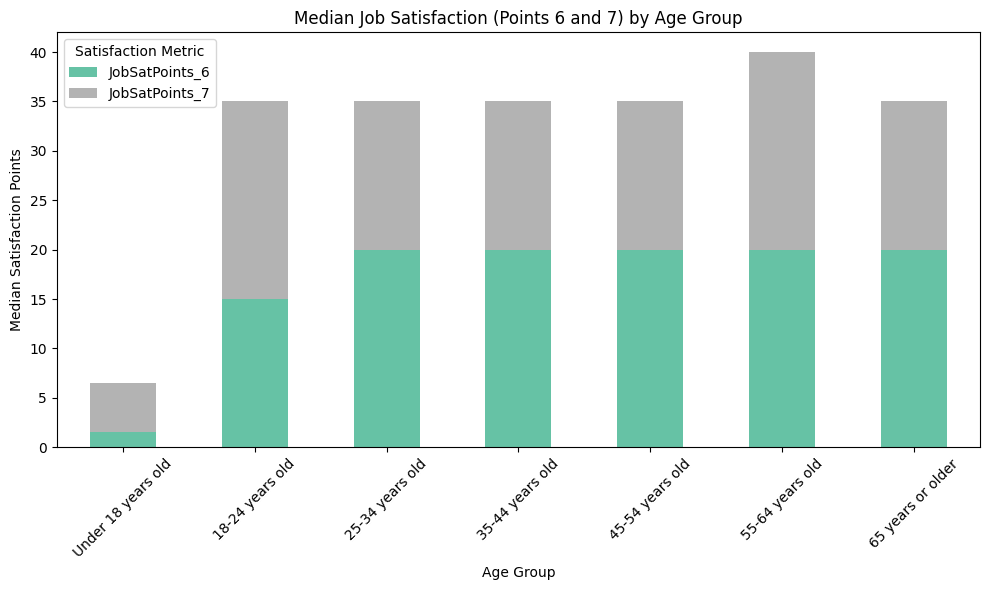

In [29]:
##Write your code here

#  Step 1: Ensure columns are numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Step 2: Remove rows with missing data
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 3: Group by Age and calculate median
median_df = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

#  Step 4: Sort Age categories if needed
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
median_df = median_df.loc[[age for age in age_order if age in median_df.index]]

#  Step 5: Plot the stacked bar chart
median_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Median Job Satisfaction (Points 6 and 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Points')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Metric')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


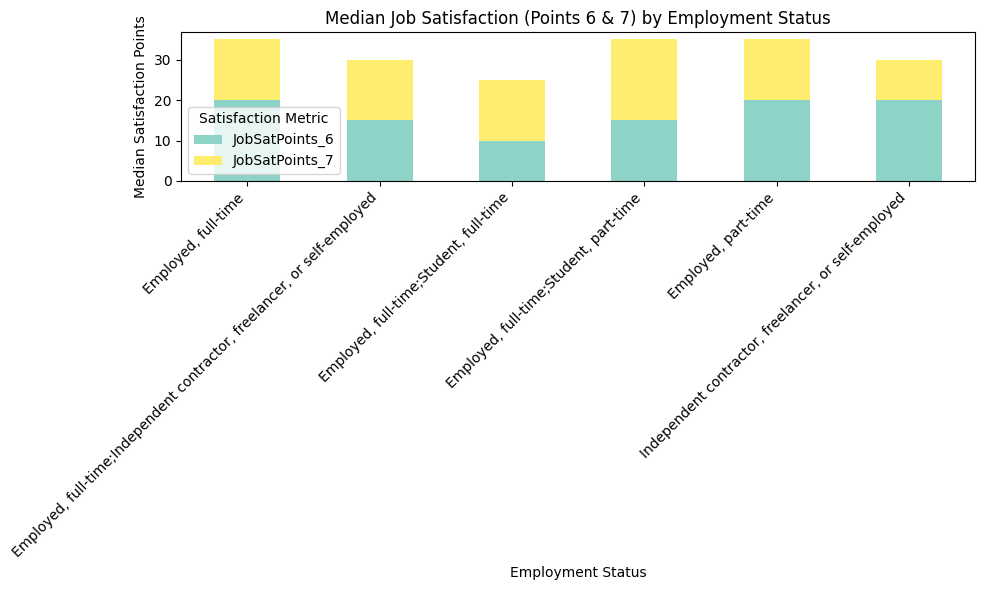

In [30]:
##Write your code here
# Convert to numeric if not already
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

median_satisfaction = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

top_employment = df_clean['Employment'].value_counts().head(6).index
median_satisfaction = median_satisfaction.loc[median_satisfaction.index.isin(top_employment)]

median_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title('Median Job Satisfaction (Points 6 & 7) by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfaction Metric')
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


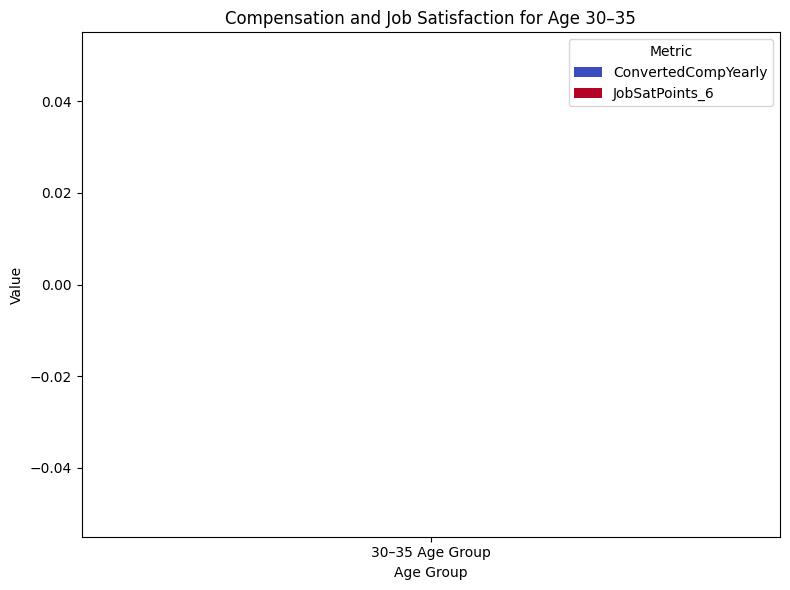

In [31]:
##Write your code here
# Step 1: Convert columns to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 2: Filter for age between 30 and 35
df_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Step 3: Aggregate (e.g., compute mean or median)
compensation = df_filtered['ConvertedCompYearly'].median()
satisfaction = df_filtered['JobSatPoints_6'].median()

# Step 4: Prepare data for stacked bar chart
stack_data = pd.DataFrame({
    '30–35 Age Group': [compensation, satisfaction]
}, index=['ConvertedCompYearly', 'JobSatPoints_6']).T

# Step 5: Plot
stack_data.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

plt.title('Compensation and Job Satisfaction for Age 30–35')
plt.ylabel('Value')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_912/1747970960.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_df = df_clean.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()


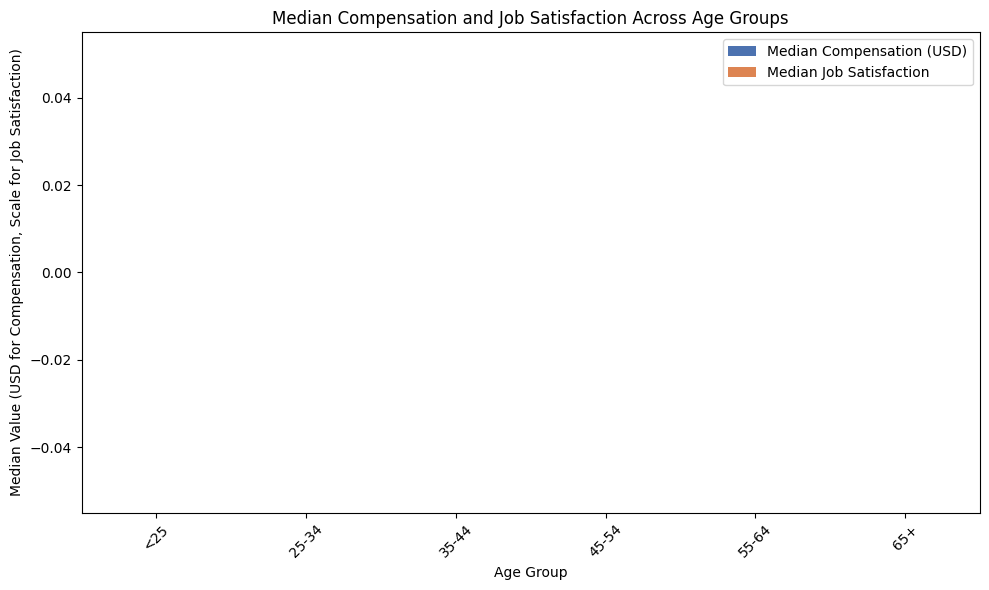

In [32]:
##Write your code here

# Step 1: Drop missing values
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6']).copy()

# Step 2: Bin ages into categories (if Age is numeric)
if df_clean['Age'].dtype in ['int64', 'float64']:
    bins = [0, 24, 34, 44, 54, 64, 100]
    labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
    df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)
else:
    df_clean['AgeGroup'] = df_clean['Age']

# Step 3: Group by AgeGroup and calculate medians
median_df = df_clean.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Step 4: Plot stacked bar chart
median_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#dd8452'])

plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value (USD for Compensation, Scale for Job Satisfaction)')
plt.xticks(rotation=45)
plt.legend(['Median Compensation (USD)', 'Median Job Satisfaction'])
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [33]:
##Write your code here

df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].astype(str).str.split(';')
df = df.explode('DatabaseWantToWorkWith')
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.strip()


In [34]:
df = df.dropna(subset=['Age', 'DatabaseWantToWorkWith'])

In [35]:
top5 = df['DatabaseWantToWorkWith'].value_counts().nlargest(5).index
df_top = df[df['DatabaseWantToWorkWith'].isin(top5)]

In [36]:
ct = pd.crosstab(df_top['Age'], df_top['DatabaseWantToWorkWith'])

print("Check crosstab dtypes:")
print(ct.dtypes)
print("\nCheck crosstab content:")
print(ct.head())

Check crosstab dtypes:
Series([], dtype: object)

Check crosstab content:
Empty DataFrame
Columns: []
Index: []


In [37]:
print(df['DatabaseWantToWorkWith'].dropna().head(10))

Series([], Name: DatabaseWantToWorkWith, dtype: object)


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [38]:
##Write your code here

# Step 1: Clean the data
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Optional: Convert JobSatPoints_6 to string if it's numeric and you want categories
df_clean['JobSatPoints_6'] = df_clean['JobSatPoints_6'].astype(str)

crosstab = pd.crosstab(df_clean['Employment'], df_clean['JobSatPoints_6'])

# Optional: Only keep top N employment types to avoid clutter
top_employment = df_clean['Employment'].value_counts().nlargest(6).index
crosstab = crosstab.loc[top_employment]



In [39]:
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title('Job Satisfaction by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction')
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [40]:
##Write your code here
# Step 1: Drop missing values
df_clean = df.dropna(subset=['Age', 'LanguageAdmired']).copy()

# Step 2: Split multi-language responses and explode
df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].astype(str).str.split(';')
df_exploded = df_clean.explode('LanguageAdmired')
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip()

# Step 3: Bin numeric Age to age groups (if needed)
if df_exploded['Age'].dtype in ['int64', 'float64']:
    age_bins = [0, 17, 24, 34, 44, 54, 64, 100]
    age_labels = [
        'Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'
    ]
    df_exploded['AgeGroup'] = pd.cut(df_exploded['Age'], bins=age_bins, labels=age_labels)
    age_col = 'AgeGroup'
else:
    age_col = 'Age'

# Step 4: Get top 5 admired languages overall
top_languages = df_exploded['LanguageAdmired'].value_counts().nlargest(5).index
df_top = df_exploded[df_exploded['LanguageAdmired'].isin(top_languages)]

# Step 5: Create crosstab of Age vs LanguageAdmired
ct = pd.crosstab(df_top[age_col], df_top['LanguageAdmired'])

# Step 6: Normalize to get proportions (optional)
ct_prop = ct.div(ct.sum(axis=1), axis=0)

# Optional: Order age groups
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
ct_prop = ct_prop.loc[[age for age in age_order if age in ct_prop.index]]

ct_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Programming Languages Admired by Age Group')
plt.ylabel('Proportion of Respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Language Admired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [41]:
##Write your code here
# Step 1: Drop rows with missing values
df_clean = df.dropna(subset=['Employment', 'PlatformAdmired']).copy()

# Step 2: Split multi-platform strings and explode into rows
df_clean['PlatformAdmired'] = df_clean['PlatformAdmired'].astype(str).str.split(';')
df_exploded = df_clean.explode('PlatformAdmired')
df_exploded['PlatformAdmired'] = df_exploded['PlatformAdmired'].str.strip()

# Step 3: Get the top N platforms overall
top_platforms = df_exploded['PlatformAdmired'].value_counts().nlargest(5).index
df_top = df_exploded[df_exploded['PlatformAdmired'].isin(top_platforms)]

# Step 4: Crosstab of Employment vs PlatformAdmired
crosstab = pd.crosstab(df_top['Employment'], df_top['PlatformAdmired'])

# Step 5: Convert counts to proportions for stacked bar
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

# Optional: Show top 6 employment types by respondent count
top_employment = df_top['Employment'].value_counts().head(6).index
crosstab_prop = crosstab_prop.loc[top_employment]

crosstab_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Admiration')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform Admired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
